# Babbel - Data Scientist Challenge
### Notebook created by: Jiacheng Yao, 20/02/2021

## 1. Explorative Analysis

In [1]:
import logging

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
sns.set_style('whitegrid')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Start 1. Explorative Analysis")

INFO:root:Start 1. Explorative Analysis


### 1. Read the input data

In [2]:
df_input = pd.read_csv('DataScientis_Challenge.csv - teaser1.csv.csv', skiprows=2)

### 2. Take a first look at the data

In [3]:
df_input.head()

,Sales figures (pcs),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,1,1049,3337,NaN,1,873,2800,NaN,1,...,3400,4441,NaN,1,6015,2899,NaN,1,1382,4891
1,NaN,2,883,2921,NaN,2,934,3031,NaN,2,...,3468,4348,NaN,2,6511,3353,NaN,2,1571,5302
2,NaN,3,868,3228,NaN,3,1139,3392,NaN,3,...,3605,4116,NaN,3,6874,2842,NaN,3,1320,5133
3,NaN,4,1044,3365,NaN,4,978,3155,NaN,4,...,3547,3642,NaN,4,6497,3037,NaN,4,1389,5319
4,NaN,5,999,3069,NaN,5,1056,3049,NaN,5,...,3331,4126,NaN,5,4764,2832,NaN,5,1579,4600


### 3. Clean up the data

In [4]:
l_data = []

l_cols = ['BE_0', 'SH_0', 'BE_1', 'SH_1', 'BE_2', 'SH_2', 
          'BE_3', 'SH_3', 'BE_4', 'SH_4', 'BE_5', 'SH_5']
for i in range(int(len(l_cols)/2)):
    df_input['BE_{}'.format(i)] = df_input.loc[:, 'Unnamed: {}'.format(i*4+2)]
    df_input['SH_{}'.format(i)] = df_input.loc[:, 'Unnamed: {}'.format(i*4+3)]

df_data = df_input[l_cols]

In [5]:
df_data.head()

,BE_0,SH_0,BE_1,SH_1,BE_2,SH_2,BE_3,SH_3,BE_4,SH_4,BE_5,SH_5
0,1049,3337,873,2800,3574,3120,3400,4441,6015,2899,1382,4891
1,883,2921,934,3031,3613,2941,3468,4348,6511,3353,1571,5302
2,868,3228,1139,3392,3559,3010,3605,4116,6874,2842,1320,5133
3,1044,3365,978,3155,3681,3223,3547,3642,6497,3037,1389,5319
4,999,3069,1056,3049,3423,3060,3331,4126,4764,2832,1579,4600


### 4. Summarize

In [6]:
df_data.describe([.1,.2,.3,.6,.7,.8,.9,.95,.98,.99,.999])

,BE_0,SH_0,BE_1,SH_1,BE_2,SH_2,BE_3,SH_3,BE_4,SH_4,BE_5,SH_5
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1001.189100,3003.468100,999.969300,3201.421100,3497.224000,3200.066200,3499.539900,3999.388600,6000.727200,3000.17860,1499.528000,5001.767600
std,99.072798,201.425546,99.500729,210.865214,248.518213,209.203721,253.811309,250.182205,404.824708,200.42672,129.680901,300.035468
min,606.000000,2304.000000,652.000000,2338.000000,2439.000000,2481.000000,2491.000000,2817.000000,4545.000000,2233.00000,1030.000000,3925.000000
10%,874.000000,2746.000000,873.000000,2931.000000,3178.000000,2930.900000,3171.000000,3677.000000,5475.900000,2741.00000,1332.000000,4620.000000
20%,917.000000,2833.000000,917.000000,3023.000000,3288.000000,3022.000000,3286.000000,3787.000000,5665.000000,2831.00000,1390.000000,4750.000000
30%,950.000000,2898.700000,947.000000,3091.000000,3366.000000,3090.000000,3364.000000,3870.000000,5787.000000,2894.00000,1433.000000,4843.000000
50%,1001.000000,3004.000000,999.000000,3201.000000,3501.000000,3200.000000,3502.000000,3998.000000,5998.000000,2999.50000,1500.000000,4998.000000
60%,1025.000000,3057.000000,1023.000000,3256.000000,3562.000000,3254.000000,3565.000000,4062.000000,6099.000000,3053.00000,1532.000000,5078.000000
70%,1053.000000,3110.000000,1050.300000,3313.000000,3628.000000,3311.000000,3630.000000,4129.000000,6205.300000,3108.00000,1568.000000,5161.000000


**Comment**: _Since we only need to allocate between the two course types, not for individual language schools, we only need to look at the aggregated data._

### 5. Aggregate the data

In [7]:
data_sum = df_data.sum(axis=0)
data_std = df_data.std(axis=0)

l_budget = [0, 0, 0, 100000, 500000, 100000, 
            500000, 500000, 1000000, 0, 100000, 1000000]
l_budget = [float(b) for b in l_budget]
df_agg = pd.DataFrame([data_sum, data_std], columns=l_cols)

In [8]:
df_agg = df_agg.T.reset_index()
df_agg['budget'] = pd.Series(l_budget)

In [9]:
df_agg.columns = ['Campaign', 'Sales_Sum', 'Sales_Std', 'Budget']

In [10]:
df_agg['Course'] = df_agg['Campaign'].apply(lambda x: x[:2])

In [11]:
df_agg

,Campaign,Sales_Sum,Sales_Std,Budget,Course
0,BE_0,10011891.0,99.072798,0.0,BE
1,SH_0,30034681.0,201.425546,0.0,SH
2,BE_1,9999693.0,99.500729,0.0,BE
3,SH_1,32014211.0,210.865214,100000.0,SH
4,BE_2,34972240.0,248.518213,500000.0,BE
5,SH_2,32000662.0,209.203721,100000.0,SH
6,BE_3,34995399.0,253.811309,500000.0,BE
7,SH_3,39993886.0,250.182205,500000.0,SH
8,BE_4,60007272.0,404.824708,1000000.0,BE
9,SH_4,30001786.0,200.426720,0.0,SH


### 6. Visualize the aggregated data

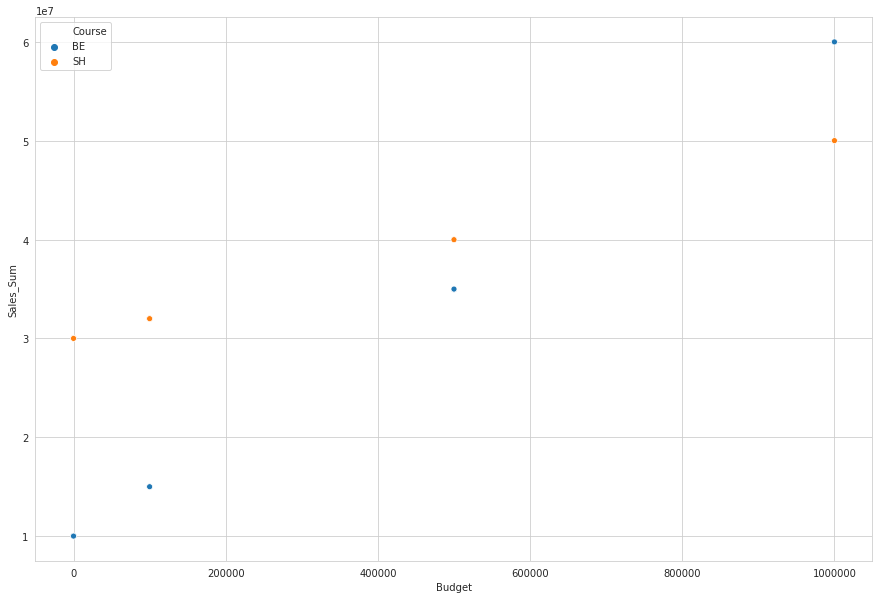

In [12]:
# Sales Sum vs Budget
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
sns.scatterplot(data=df_agg, x="Budget", y="Sales_Sum", hue="Course")

plt.savefig("budget_sales.png")

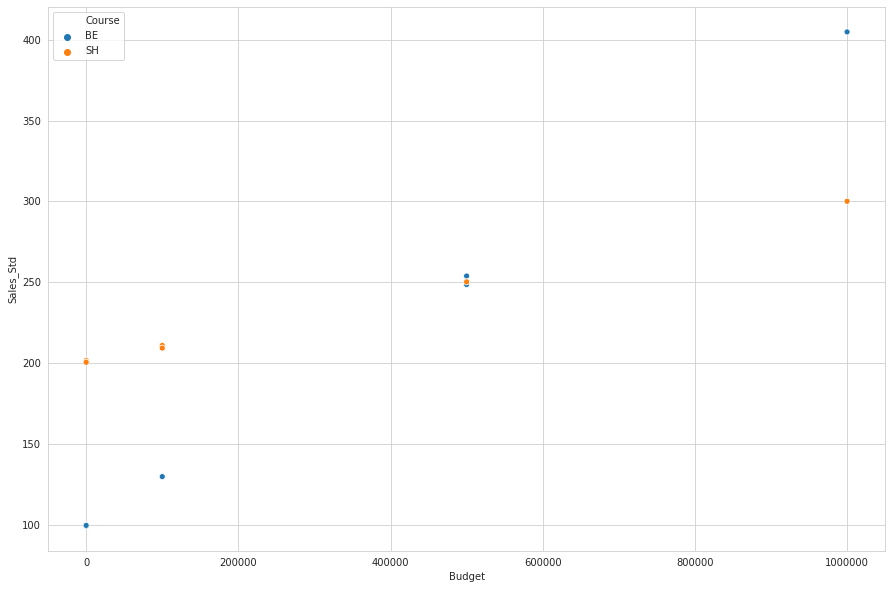

In [13]:
# Sales Standard Deviation vs Budget
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
sns.scatterplot(data=df_agg, x="Budget", y="Sales_Std", hue="Course")

plt.savefig("budget_sales_std.png")

**Comment**: _It seems that 1. Sales and Budget for Business English have strong linear correlation, the same goes for Spanish for Holidays. We will aim to check if this is indeed the case._

### 7. Check if Sales and Budget have strong linear correlation.

In [14]:
df_agg_BE = df_agg[df_agg['Course']=='BE']
df_agg_SH = df_agg[df_agg['Course']=='SH']

In [15]:
df_agg_BE

,Campaign,Sales_Sum,Sales_Std,Budget,Course
0,BE_0,10011891.0,99.072798,0.0,BE
2,BE_1,9999693.0,99.500729,0.0,BE
4,BE_2,34972240.0,248.518213,500000.0,BE
6,BE_3,34995399.0,253.811309,500000.0,BE
8,BE_4,60007272.0,404.824708,1000000.0,BE
10,BE_5,14995280.0,129.680901,100000.0,BE


In [16]:
df_agg_SH

,Campaign,Sales_Sum,Sales_Std,Budget,Course
1,SH_0,30034681.0,201.425546,0.0,SH
3,SH_1,32014211.0,210.865214,100000.0,SH
5,SH_2,32000662.0,209.203721,100000.0,SH
7,SH_3,39993886.0,250.182205,500000.0,SH
9,SH_4,30001786.0,200.426720,0.0,SH
11,SH_5,50017676.0,300.035468,1000000.0,SH


In [17]:
logging.info("Correlation between Sales and Budget for Business English: {}".format(df_agg_BE['Sales_Sum'].corr(df_agg_BE['Budget'])))
logging.info("Correlation between Sales Std and Budget for Business English: {}".format(df_agg_BE['Sales_Std'].corr(df_agg_BE['Budget'])))
logging.info("Correlation between Sales and Budget for Spanish for Holidays: {}".format(df_agg_SH['Sales_Sum'].corr(df_agg_SH['Budget'])))
logging.info("Correlation between Sales Std and Budget for Spanish for Holidays: {}".format(df_agg_SH['Sales_Std'].corr(df_agg_SH['Budget'])))

INFO:root:Correlation between Sales and Budget for Business English: 0.9999997570069796
INFO:root:Correlation between Sales Std and Budget for Business English: 0.9998960269007005
INFO:root:Correlation between Sales and Budget for Spanish for Holidays: 0.9999982633754445
INFO:root:Correlation between Sales Std and Budget for Spanish for Holidays: 0.9998340622182769


**Comment**: _The correlation is close to 1, both for sales, and for sales standard deviation. Therefore we will use linear regression._

## 2. Fit models and find the optimal allocation

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regr_BE = LinearRegression()
regr_SH = LinearRegression()
regr_BE_std = LinearRegression()
regr_SH_std = LinearRegression()
# train the models using the training sets
regr_BE.fit(df_agg_BE.loc[:, 'Budget'].values.reshape(-1, 1), 
            df_agg_BE.loc[:, 'Sales_Sum'].values.reshape(-1, 1))
regr_SH.fit(df_agg_SH.loc[:, 'Budget'].values.reshape(-1, 1), 
            df_agg_SH.loc[:, 'Sales_Sum'].values.reshape(-1, 1))
regr_BE_std.fit(df_agg_BE.loc[:, 'Budget'].values.reshape(-1, 1), 
            df_agg_BE.loc[:, 'Sales_Std'].values.reshape(-1, 1))
regr_SH_std.fit(df_agg_SH.loc[:, 'Budget'].values.reshape(-1, 1), 
            df_agg_SH.loc[:, 'Sales_Std'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
N = 1001
total_budget = 1000000

x_budget_BE = np.linspace(0, total_budget, N, endpoint=True)
x_budget_SH = total_budget - x_budget_BE

# total expected profit (TEP)
y_TEP = 30*regr_BE.predict(x_budget_BE.reshape(-1, 1)) + 20*regr_SH.predict(x_budget_SH.reshape(-1, 1)) - total_budget
# total expected profit (TEP) / standard deviation
y_TEP_div_std = 30*regr_BE.predict(x_budget_BE.reshape(-1, 1)) / regr_BE_std.predict(x_budget_BE.reshape(-1, 1)) + \
20*regr_SH.predict(x_budget_SH.reshape(-1, 1)) / regr_SH_std.predict(x_budget_SH.reshape(-1, 1))

In [21]:
# store the output as dataframe for visualization purposes
df_scatterplot = pd.DataFrame(data=[x_budget_BE, y_TEP, y_TEP_div_std]).T
df_scatterplot.columns = ['Business English Budget', 'Expected Profit', 'Expected Profit / std']

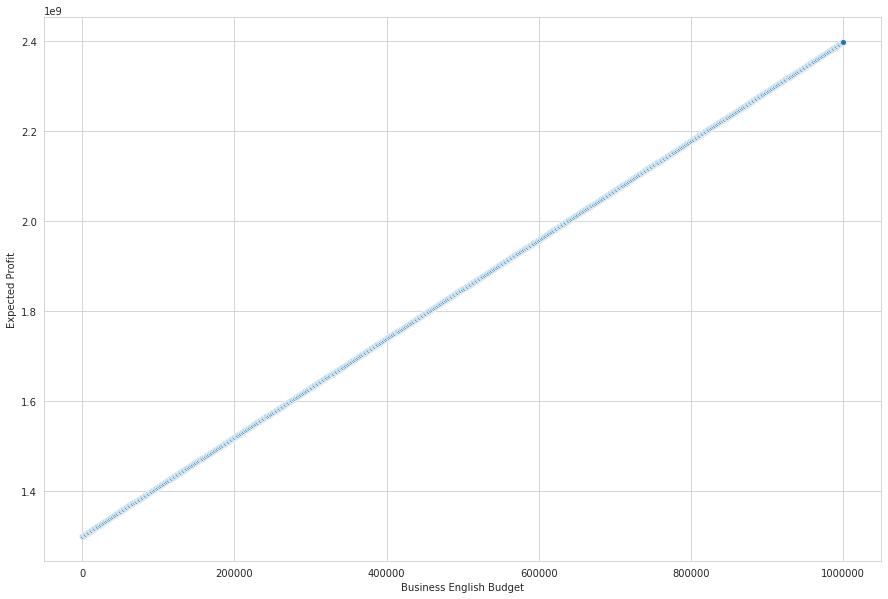

In [22]:
# now we visualize: x-axis - budget for Business English, y-axis - total expected profit (TEP)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
sns.scatterplot(data=df_scatterplot, x="Business English Budget", y="Expected Profit")

plt.savefig("be_budget_tep.png")

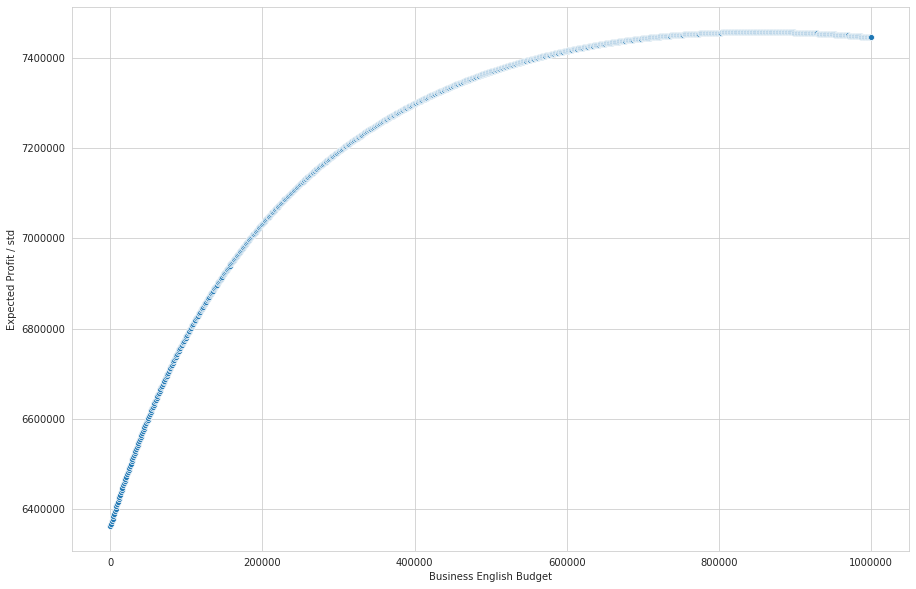

In [23]:
# now we visualize: x-axis - budget for Business English, y-axis - total expected profit (TEP) / standard deviation
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
sns.scatterplot(data=df_scatterplot, x="Business English Budget", y="Expected Profit / std")

plt.savefig("be_budget_tep_div_std.png")

In [24]:
# find the optimal budget for business english - two objectives
optimal_budget_BE_a = x_budget_BE[np.argmax(y_TEP)]
optimal_budget_BE_b = x_budget_BE[np.argmax(y_TEP_div_std)]

In [25]:
logging.info("a) Optimal budget for Business English (Maximise expected profit): {}".format(optimal_budget_BE_a))
logging.info("a) Optimal budget for Spanish for Holidays (Maximise expected profit): {}".format(total_budget - optimal_budget_BE_a))
logging.info("b) Optimal budget for Business English (Maximise expected profit / profit standard deviation): {}".format(optimal_budget_BE_b))
logging.info("b) Optimal budget for Spanish for Holidays (Maximise expected profit / profit standard deviation): {}".format(total_budget - optimal_budget_BE_b))

INFO:root:a) Optimal budget for Business English (Maximise expected profit): 1000000.0
INFO:root:a) Optimal budget for Spanish for Holidays (Maximise expected profit): 0.0
INFO:root:b) Optimal budget for Business English (Maximise expected profit / profit standard deviation): 851000.0
INFO:root:b) Optimal budget for Spanish for Holidays (Maximise expected profit / profit standard deviation): 149000.0
